In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import cv2
import tensorflow as tf
from tensorflow import keras


In [2]:
def read_data(path):

  train_path=path+"/train"
  test_path=path+"/test"
  validation_path=path+"/val"

  train_data,test_data,val_data = [],[],[]
  tr_out,test_out,val_out = [],[],[]
  
  for i in os.listdir(train_path):

      if i != ".DS_Store":
          for j in os.listdir(train_path+"/"+i):
              train_data.append(cv2.imread(train_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
              tr_out.append(i)

          for j in os.listdir(test_path+"/"+i):
              test_data.append(cv2.imread(test_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
              test_out.append(i)

          for j in os.listdir(validation_path+"/"+i):
              val_data.append(cv2.imread(validation_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
              val_out.append(i)
    
  train_data, test_data, val_data = np.array(train_data), np.array(test_data), np.array(val_data)
  tr_out, test_out, val_out = np.array(list(map(int, tr_out))), np.array(list(map(int, test_out))), np.array(list(map(int, val_out)))

  return train_data, test_data, val_data, tr_out, test_out, val_out


In [ ]:
path  = "/content/drive/MyDrive/Group_22"
train_data,test_data,val_data,tr_out,test_out,val_out = read_data(path)

In [ ]:
train_data = train_data/255
test_data = test_data/255
val_data = val_data/255

In [ ]:
# Architechture for Autoencoder for one hidden layer with 64 neuron 
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out = keras.layers.Dense(64,activation='sigmoid')(x)

# Encoder model for getting compressed representation of image
encoder1 = keras.Model(x_in,encoder_out,name="encoder")

decoder_ip = keras.layers.Dense(784,activation='sigmoid')(encoder_out)

decoder_op = keras.layers.Reshape((28,28,1))(decoder_ip)
optimizer = keras.optimizers.Adam(learning_rate = 0.01,decay = 1e-6)

# Autoencoder model for getting reconstructed image
Autoencoder1 = keras.Model(x_in,decoder_op,name="Autoencoder1")
Autoencoder1.summary()


Model: "Autoencoder1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
358/358 [==============================] - 2s 6ms/step - loss: 0.0434 - accuracy: 0.6519 - val_loss: 0.0334 - val_accuracy: 0.6581
Epoch 2/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0272 - accuracy: 0.6627 - val_loss: 0.0231 - val_accuracy: 0.6645
Epoch 3/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0198 - accuracy: 0.6669 - val_loss: 0.0182 - val_accuracy: 0.6670
Epoch 4/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0164 - accuracy: 0.6685 - val_loss: 0.0158 - val_accuracy: 0.6680
Epoch 5/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0143 - accuracy: 0.6693 - val_loss: 0.0144 - val_accuracy: 0.6685
Epoch 6/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0132 - accuracy: 0.6697 - val_loss: 0.0143 - val_accuracy: 0.6686
Epoch 7/100
358/358 [==============================] - 2s 4ms/step - loss: 0.0125 - accuracy: 0.6700 - val_loss: 0.0127 - val_accuracy: 0.6692

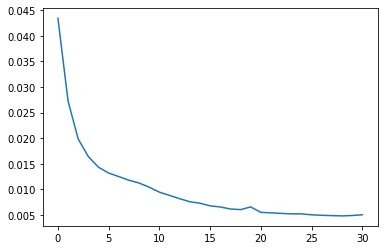

In [ ]:
# callback for define stopping criteria as consicutive difference between error is less that 0.0001
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=3)

# compile the model for adam optimizer and accuracy matrics and loss as MSE
Autoencoder1.compile(optimizer,loss="mse",metrics=['accuracy'])
history = Autoencoder1.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback], validation_data=(val_data, val_data))
plt.plot(history.history['loss'])



plt.savefig("/content/drive/MyDrive/autoencoder_output/A1loss.png")

In [ ]:
val_data.shape

(3855, 28, 28)

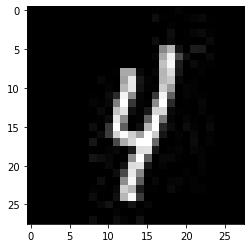

In [ ]:
# predict reconstructed image with use of Autoencoder model
model_op64 = Autoencoder1.predict([test_data[1].reshape(-1,28,28,1)])
#original Image from dataset
plt.imshow(test_data[1],cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/test_original1.png")

In [ ]:
#reshape the vector into image
model_op64=model_op64.reshape(28,28)

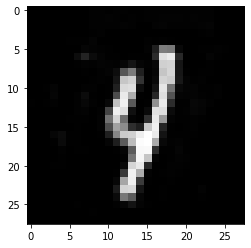

In [ ]:
# reconstructed image of original image which predicted by Autoencoder
plt.imshow(model_op64,cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/test_reconstruction1.png")

In [ ]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out = keras.layers.Dense(100,activation='sigmoid')(x)
encoder_2 = keras.Model(x_in,encoder_out,name="encoder")

decoder_ip = keras.layers.Dense(784,activation='sigmoid')(encoder_out)

decoder_op = keras.layers.Reshape((28,28,1))(decoder_ip)
optimizer = keras.optimizers.Adam(learning_rate = 0.01,decay = 1e-6)

Autoencoder2 = keras.Model(x_in,decoder_op,name="Autoencoder2")
Autoencoder2.summary()


Model: "Autoencoder2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 784)               79184     
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
358/358 [==============================] - 2s 4ms/step - loss: 0.0329 - accuracy: 0.6593 - val_loss: 0.0187 - val_accuracy: 0.6669
Epoch 2/100
358/358 [==============================] - 1s 4ms/step - loss: 0.0134 - accuracy: 0.6699 - val_loss: 0.0108 - val_accuracy: 0.6702
Epoch 3/100
358/358 [==============================] - 1s 4ms/step - loss: 0.0088 - accuracy: 0.6715 - val_loss: 0.0084 - val_accuracy: 0.6710
Epoch 4/100
358/358 [==============================] - 1s 4ms/step - loss: 0.0068 - accuracy: 0.6721 - val_loss: 0.0070 - val_accuracy: 0.6713
Epoch 5/100
358/358 [==============================] - 2s 4ms/step - loss: 0.0058 - accuracy: 0.6723 - val_loss: 0.0062 - val_accuracy: 0.6715
Epoch 6/100
358/358 [==============================] - 1s 3ms/step - loss: 0.0050 - accuracy: 0.6724 - val_loss: 0.0064 - val_accuracy: 0.6714
Epoch 7/100
358/358 [==============================] - 1s 4ms/step - loss: 0.0045 - accuracy: 0.6725 - val_loss: 0.0050 - val_accuracy: 0.6718

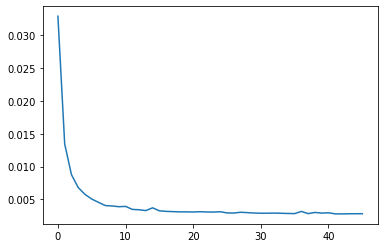

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)

Autoencoder2.compile(optimizer,loss="mse",metrics=['accuracy'])
history2 = Autoencoder2.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
#history_val = Autoencoder1.evaluate(val_data)
#print("test loss", history_val)

#history_val2 = Autoencoder2.fit(val_data,val_data,epochs=100,batch_size=32,callbacks=[callback])
plt.plot(history2.history['loss'])

plt.savefig("/content/drive/MyDrive/autoencoder_output/A2loss.png")

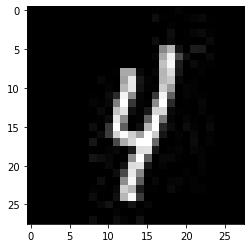

In [ ]:
model_op100 = Autoencoder2.predict([test_data[1].reshape(-1,28,28,1)])
plt.imshow(test_data[1],cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/test_original_image2.png")

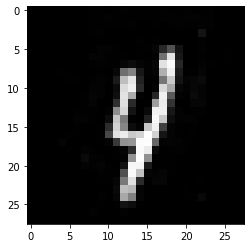

In [ ]:
model_op100=model_op100.reshape(28,28)
plt.imshow(model_op100,cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/test_reconstructed_image2.png")

In [ ]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out = keras.layers.Dense(144,activation='sigmoid')(x)
encoder_3 = keras.Model(x_in,encoder_out,name="encoder_3")

decoder_ip = keras.layers.Dense(784,activation='sigmoid')(encoder_out)

decoder_op = keras.layers.Reshape((28,28,1))(decoder_ip)
optimizer = keras.optimizers.Adam(learning_rate = 0.01,decay = 1e-6)

Autoencoder3 = keras.Model(x_in,decoder_op,name="Autoencoder3")
Autoencoder3.summary()


Model: "Autoencoder3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 144)               113040    
                                                                 
 dense_5 (Dense)             (None, 784)               113680    
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 226,720
Trainable params: 226,720
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0272 - accuracy: 0.6627 - val_loss: 0.0137 - val_accuracy: 0.6693
Epoch 2/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0095 - accuracy: 0.6713 - val_loss: 0.0085 - val_accuracy: 0.6708
Epoch 3/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0063 - accuracy: 0.6721 - val_loss: 0.0057 - val_accuracy: 0.6716
Epoch 4/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0048 - accuracy: 0.6725 - val_loss: 0.0059 - val_accuracy: 0.6717
Epoch 5/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0042 - accuracy: 0.6726 - val_loss: 0.0046 - val_accuracy: 0.6718
Epoch 6/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0036 - accuracy: 0.6727 - val_loss: 0.0043 - val_accuracy: 0.6719
Epoch 7/100
358/358 [==============================] - 2s 4ms/step - loss: 0.0033 - accuracy: 0.6727 - val_loss: 0.0041 - val_accuracy: 0.6719

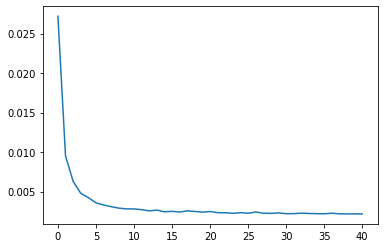

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
Autoencoder3.compile(optimizer,loss="mse",metrics=['accuracy'])
history3 = Autoencoder3.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
#history_val3 = Autoencoder3.fit(val_data,val_data,epochs=100,batch_size=32,callbacks=[callback])
#compressed_rep_train = encoder_3.predict(train_data)
#compressed_rep_valid = encoder_3.predict(val_data)
#compressed_rep_test = encoder_3.predict(test_data)
plt.plot(history3.history['loss'])

plt.savefig("/content/drive/MyDrive/autoencoder_output/A3loss.png")


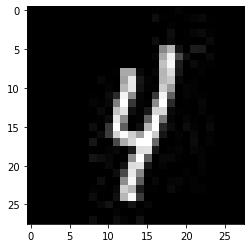

In [ ]:
model_op144 = Autoencoder3.predict([test_data[1].reshape(-1,28,28,1)])
plt.imshow(test_data[1],cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/test_original_image.png")

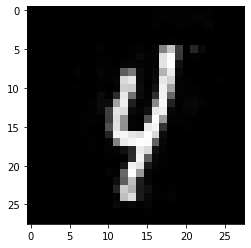

In [ ]:
model_op144=model_op144.reshape(28,28)
plt.imshow(model_op144,cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/test_reconstructed_image.png")

In [2]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out = keras.layers.Dense(196,activation='sigmoid')(x)
encoder_4 = keras.Model(x_in,encoder_out,name="encoder_3")

decoder_ip = keras.layers.Dense(784,activation='sigmoid')(encoder_out)

decoder_op = keras.layers.Reshape((28,28,1))(decoder_ip)
optimizer = keras.optimizers.Adam(learning_rate = 0.01,decay = 1e-6)

Autoencoder4 = keras.Model(x_in,decoder_op,name="Autoencoder4")
Autoencoder4.summary()


Model: "Autoencoder4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 196)               153860    
                                                                 
 dense_1 (Dense)             (None, 784)               154448    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 308,308
Trainable params: 308,308
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
358/358 [==============================] - 7s 18ms/step - loss: 0.0229 - accuracy: 0.6650 - val_loss: 0.0069 - val_accuracy: 0.6714
Epoch 2/100
358/358 [==============================] - 8s 23ms/step - loss: 0.0049 - accuracy: 0.6724 - val_loss: 0.0048 - val_accuracy: 0.6718
Epoch 3/100
358/358 [==============================] - 6s 18ms/step - loss: 0.0036 - accuracy: 0.6726 - val_loss: 0.0044 - val_accuracy: 0.6719
Epoch 4/100
358/358 [==============================] - 8s 21ms/step - loss: 0.0030 - accuracy: 0.6727 - val_loss: 0.0039 - val_accuracy: 0.6720
Epoch 5/100
358/358 [==============================] - 7s 19ms/step - loss: 0.0027 - accuracy: 0.6727 - val_loss: 0.0039 - val_accuracy: 0.6720
Epoch 6/100
358/358 [==============================] - 6s 18ms/step - loss: 0.0025 - accuracy: 0.6728 - val_loss: 0.0036 - val_accuracy: 0.6720
Epoch 7/100
358/358 [==============================] - 6s 18ms/step - loss: 0.0024 - accuracy: 0.6728 - val_loss: 0.0033 - val_accuracy:

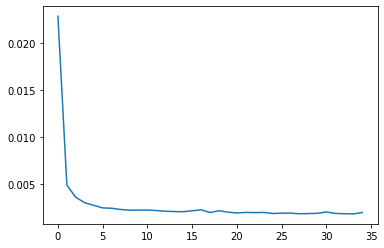

In [7]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
Autoencoder4.compile(optimizer,loss="mse",metrics=['accuracy'])
history4 = Autoencoder4.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
#history_val3 = Autoencoder3.fit(val_data,val_data,epochs=100,batch_size=32,callbacks=[callback])
#compressed_rep_train = encoder_3.predict(train_data)
#compressed_rep_valid = encoder_3.predict(val_data)
#compressed_rep_test = encoder_3.predict(test_data)
plt.plot(history4.history['loss'])

plt.savefig("/content/drive/MyDrive/autoencoder_output/A41024loss.png")

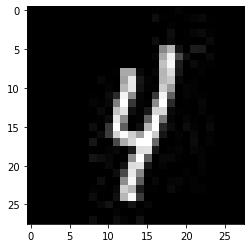

In [8]:
model_op196 = Autoencoder4.predict([test_data[1].reshape(-1,28,28,1)])
plt.imshow(test_data[1],cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/1024test_original_image4.png")

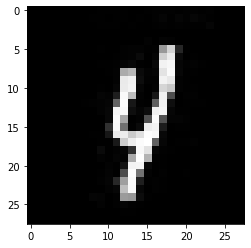

In [9]:
model_op196=model_op196.reshape(28,28)
plt.imshow(model_op196,cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/1024test_reconstructed_image4.png")

In [ ]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out = keras.layers.Dense(256,activation='sigmoid')(x)
encoder_5 = keras.Model(x_in,encoder_out,name="encoder_3")

decoder_ip = keras.layers.Dense(784,activation='sigmoid')(encoder_out)

decoder_op = keras.layers.Reshape((28,28,1))(decoder_ip)
optimizer = keras.optimizers.Adam(learning_rate = 0.01,decay = 1e-6)

Autoencoder5 = keras.Model(x_in,decoder_op,name="Autoencoder5")
Autoencoder5.summary()

Model: "Autoencoder5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 784)               201488    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
358/358 [==============================] - 5s 5ms/step - loss: 0.0199 - accuracy: 0.6658 - val_loss: 0.0090 - val_accuracy: 0.6708
Epoch 2/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0062 - accuracy: 0.6721 - val_loss: 0.0055 - val_accuracy: 0.6717
Epoch 3/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0042 - accuracy: 0.6725 - val_loss: 0.0048 - val_accuracy: 0.6718
Epoch 4/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0035 - accuracy: 0.6727 - val_loss: 0.0041 - val_accuracy: 0.6719
Epoch 5/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0030 - accuracy: 0.6727 - val_loss: 0.0033 - val_accuracy: 0.6720
Epoch 6/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.6728 - val_loss: 0.0034 - val_accuracy: 0.6720
Epoch 7/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.6728 - val_loss: 0.0033 - val_accuracy: 0.6721

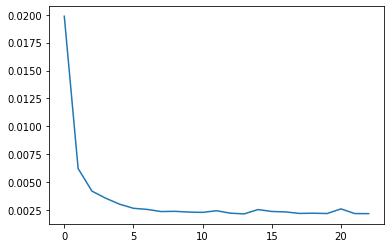

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
Autoencoder5.compile(optimizer,loss="mse",metrics=['accuracy'])
history5 = Autoencoder5.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
#history_val3 = Autoencoder3.fit(val_data,val_data,epochs=100,batch_size=32,callbacks=[callback])
#compressed_rep_train = encoder_3.predict(train_data)
#compressed_rep_valid = encoder_3.predict(val_data)
#compressed_rep_test = encoder_3.predict(test_data)
plt.plot(history5.history['loss'])

plt.savefig("/content/drive/MyDrive/autoencoder_output/A5loss.png")

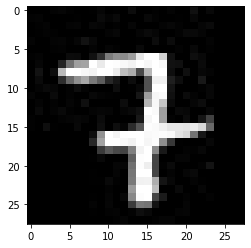

In [ ]:
model_op256 = Autoencoder5.predict([train_data[6500].reshape(-1,28,28,1)])
plt.imshow(train_data[6500],cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/test_org_image5train9.png")

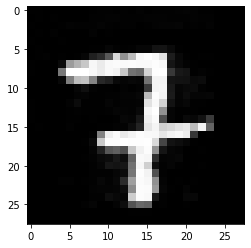

In [ ]:
model_op256 = model_op256.reshape(28,28)
plt.imshow(model_op256,cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/test_reconst_image5train9.png")

In [ ]:
# To get compressed representation of image from train_data, val_dat, test_data for using that compressed representation in classifiction.
encoder_train5 = encoder_5.predict([train_data.reshape(-1,28,28,1)])
encoder_val5 = encoder_5.predict([val_data.reshape(-1,28,28,1)])
encoder_test5 = encoder_5.predict([test_data.reshape(-1,28,28,1)])

print(encoder_train5.shape)
print(encoder_val5.shape)
print(encoder_test5.shape)

(11425, 256)
(3855, 256)
(3845, 256)


In [ ]:
# Model of FCNN with 3 hidden layers for classification 
model51 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(361, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(289, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(361, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model51.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained = model51.fit(encoder_train5, tr_out, epochs=10000, callbacks=callback)

# For getting validation loss and accuracy.
loss, mse = model51.evaluate(encoder_val5, val_out)


Epoch 1/10000
358/358 [==============================] - 2s 4ms/step - loss: 0.6331 - accuracy: 0.7508
Epoch 2/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.2078 - accuracy: 0.9323
Epoch 3/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1802 - accuracy: 0.9417
Epoch 4/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1603 - accuracy: 0.9474
Epoch 5/10000
358/358 [==============================] - 2s 6ms/step - loss: 0.1491 - accuracy: 0.9511
Epoch 6/10000
358/358 [==============================] - 2s 6ms/step - loss: 0.1401 - accuracy: 0.9517
Epoch 7/10000
358/358 [==============================] - 2s 5ms/step - loss: 0.1293 - accuracy: 0.9575
Epoch 8/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1204 - accuracy: 0.9587
Epoch 9/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1093 - accuracy: 0.9624
Epoch 10/10000
358/358 [==============================] - 1s 4ms/step - l

In [ ]:
# confusion matrix for best architecture 
from sklearn.metrics import confusion_matrix
prediction_test = model51.predict(encoder_test5)
prdicted_value = [np.argmax(label) for label in prediction_test]
cm = confusion_matrix(test_out,prdicted_value)
print(cm)




[[760   0   3   4   2]
 [  1 765   2   2   9]
 [  1   4 736   3  15]
 [  0   8   3 742   6]
 [  0  10   9   7 753]]


In [ ]:
#For getting loss and accuracy for testing
loss, mse = model51.evaluate(encoder_test5, test_out)

121/121 [==============================] - 0s 3ms/step - loss: 0.1367 - accuracy: 0.9769


In [ ]:
model52 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(289, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(289, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model52.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained = model52.fit(encoder_train5, tr_out, epochs=10000, callbacks=callback)
loss, mse = model52.evaluate(encoder_val5, val_out)


Epoch 1/10000
358/358 [==============================] - 2s 4ms/step - loss: 0.6776 - accuracy: 0.7368
Epoch 2/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.2056 - accuracy: 0.9320
Epoch 3/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1786 - accuracy: 0.9413
Epoch 4/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1626 - accuracy: 0.9451
Epoch 5/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1479 - accuracy: 0.9499
Epoch 6/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1382 - accuracy: 0.9549
Epoch 7/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1280 - accuracy: 0.9575
Epoch 8/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1165 - accuracy: 0.9602
Epoch 9/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1012 - accuracy: 0.9665
Epoch 10/10000
358/358 [==============================] - 1s 4ms/step - l

In [ ]:
model53 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(400, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(400, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model53.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained = model53.fit(encoder_train5, tr_out, epochs=10000, callbacks=callback)
loss, mse = model53.evaluate(encoder_val5, val_out)


Epoch 1/10000
358/358 [==============================] - 2s 4ms/step - loss: 0.6600 - accuracy: 0.7447
Epoch 2/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.2096 - accuracy: 0.9305
Epoch 3/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1729 - accuracy: 0.9443
Epoch 4/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1591 - accuracy: 0.9470
Epoch 5/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1479 - accuracy: 0.9507
Epoch 6/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1332 - accuracy: 0.9558
Epoch 7/10000
358/358 [==============================] - 1s 3ms/step - loss: 0.1304 - accuracy: 0.9554
Epoch 8/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.1105 - accuracy: 0.9641
Epoch 9/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.0999 - accuracy: 0.9675
Epoch 10/10000
358/358 [==============================] - 1s 4ms/step - l

In [ ]:
# For getting weight between input and hidden layer
weight1 = Autoencoder5.layers[2].get_weights()
weight1[0].shape

(784, 256)

In [ ]:
w1 = []
# each weight matrix size will be 781 X 1 so it will convert into 28 X 28 for weight visulization 
for w in weight1[0].T:
    w1.append(w.reshape(28, 28))
    
w1 = np.array(w1)
w1.shape

(256, 28, 28)

<function matplotlib.pyplot.show>

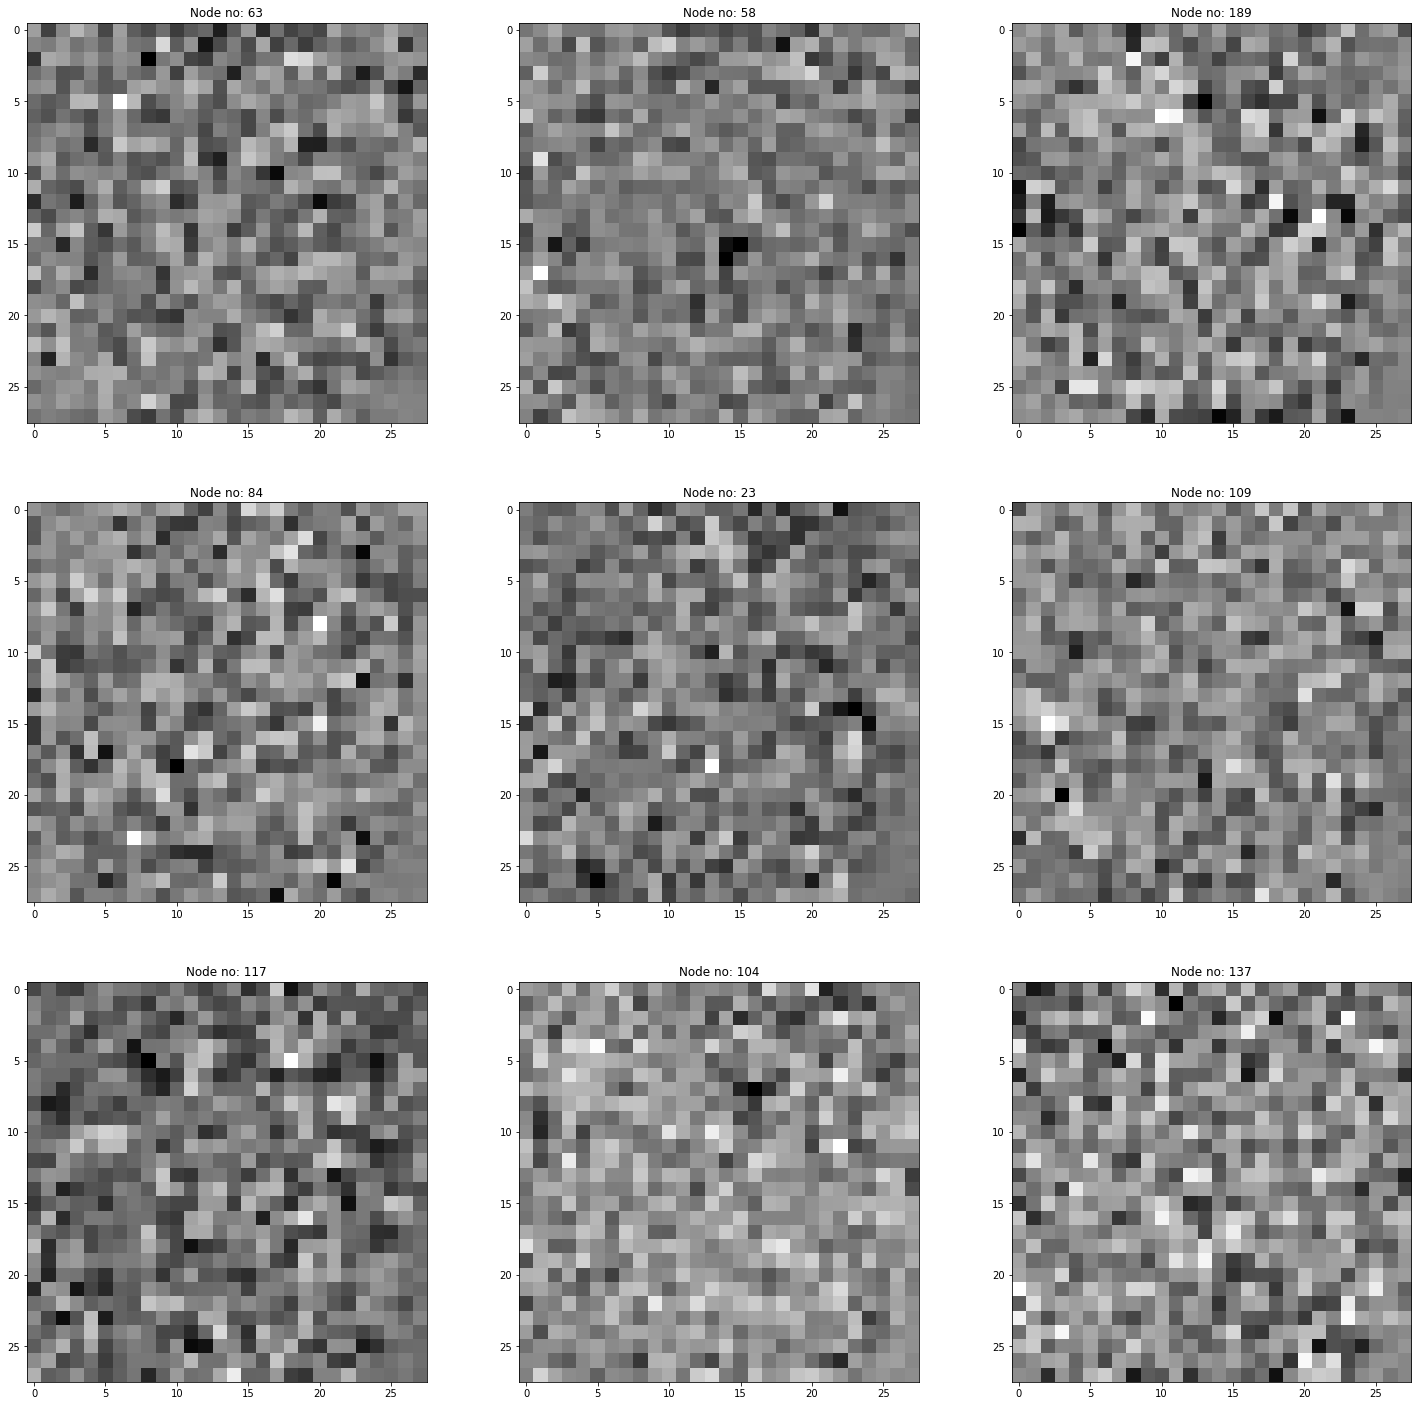

In [ ]:
# For weight visulization of any random 9 neuron out of 256 neuron weight matrices
n = 9
plt.figure(figsize=(25, 25))
for i in range(n):
    k = np.random.randint(0, 256)
    ax = plt.subplot(3, 3, i+1)
    plt.title("Node no: "+str(k))
    plt.imshow(w1[k], cmap='gray')
    plt.savefig("/content/drive/MyDrive/autoencoder_output/weight_img5"+str(np.random.randint(1, 100000))+".png")
plt.show

In [ ]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out311 = keras.layers.Dense(144,activation='sigmoid')(x)
encoder311 = keras.Model(x_in,encoder_out311,name="encoder1")

encoder_out312 = keras.layers.Dense(100,activation='sigmoid')(encoder_out311)
encoder312 = keras.Model(x_in,encoder_out312,name="encoder312")

decoder_ip310 = keras.layers.Dense(144,activation='sigmoid')(encoder_out312)

decoder_ip311 = keras.layers.Dense(784,activation='sigmoid')(decoder_ip310)

decoder_op312 = keras.layers.Reshape((28,28,1))(decoder_ip311)
optimizer = keras.optimizers.Adam(learning_rate = 0.01,decay = 1e-6)

Autoencoder31 = keras.Model(x_in,decoder_op312,name="Autoencoder31")
Autoencoder31.summary()

Model: "Autoencoder31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 144)               113040    
                                                                 
 dense_3 (Dense)             (None, 100)               14500     
                                                                 
 dense_4 (Dense)             (None, 144)               14544     
                                                                 
 dense_5 (Dense)             (None, 784)               113680    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)       

Epoch 1/100
358/358 [==============================] - 3s 6ms/step - loss: 0.0516 - accuracy: 0.6452 - val_loss: 0.0422 - val_accuracy: 0.6508
Epoch 2/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0368 - accuracy: 0.6555 - val_loss: 0.0329 - val_accuracy: 0.6578
Epoch 3/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0302 - accuracy: 0.6602 - val_loss: 0.0292 - val_accuracy: 0.6601
Epoch 4/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0272 - accuracy: 0.6622 - val_loss: 0.0264 - val_accuracy: 0.6618
Epoch 5/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0247 - accuracy: 0.6636 - val_loss: 0.0241 - val_accuracy: 0.6633
Epoch 6/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0227 - accuracy: 0.6648 - val_loss: 0.0223 - val_accuracy: 0.6643
Epoch 7/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0209 - accuracy: 0.6658 - val_loss: 0.0203 - val_accuracy: 0.6655

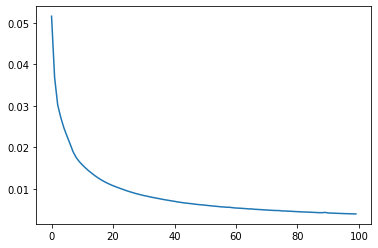

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
Autoencoder31.compile(optimizer,loss="mse",metrics=['accuracy'])
history31 = Autoencoder31.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
#history_val31 = Autoencoder31.fit(val_data,val_data,epochs=100,batch_size=32,callbacks=[callback])
plt.plot(history31.history['loss'])

plt.savefig("/content/drive/MyDrive/autoencoder_output/A31loss.png")

In [ ]:
encoder_op311 = encoder311.predict([test_data[1].reshape(-1,28,28,1)])
#plt.imshow(encoder_op311.reshape(12,12),cmap="gray")

In [ ]:
encoder_train311 = encoder311.predict([train_data.reshape(-1,28,28,1)])
#encoder_train1= encoder_train1.reshape(8,8)
encoder_val311 = encoder311.predict([val_data.reshape(-1,28,28,1)])
#encoder_val1 = encoder_val1.reshape(8,8)
encoder_test311 = encoder311.predict([test_data.reshape(-1,28,28,1)])
#encoder_val1 = encoder_test1.reshape(8,8)
print(encoder_train311.shape)
print(encoder_val311.shape)
print(encoder_test311.shape)

(11425, 144)
(3855, 144)
(3845, 144)


In [ ]:
model311 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(289, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(289, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model311.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained311 = model311.fit(encoder_train311, tr_out, epochs=10000, callbacks=callback)
loss, mse = model311.evaluate(encoder_val311, val_out)

Epoch 1/10000
358/358 [==============================] - 2s 4ms/step - loss: 1.4652 - accuracy: 0.3173
Epoch 2/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.7217 - accuracy: 0.7035
Epoch 3/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.5226 - accuracy: 0.7971
Epoch 4/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.4444 - accuracy: 0.8343
Epoch 5/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.4004 - accuracy: 0.8586
Epoch 6/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.3558 - accuracy: 0.8762
Epoch 7/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.3425 - accuracy: 0.8812
Epoch 8/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.3178 - accuracy: 0.8909
Epoch 9/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.3655 - accuracy: 0.8771
Epoch 10/10000
358/358 [==============================] - 1s 4ms/step - l

In [ ]:
from sklearn.metrics import confusion_matrix
prediction_test311 = model311.predict(encoder_test311)
prdicted_value311 = [np.argmax(label) for label in prediction_test311]
cm31 = confusion_matrix(test_out,prdicted_value311)
print(cm31)


[[757   0   3   8   1]
 [  4 744   5   6  20]
 [  9   6 728   3  13]
 [ 10   5   2 733   9]
 [  6  24  13  13 723]]


In [ ]:
loss, mse = model311.evaluate(encoder_test311, test_out)

121/121 [==============================] - 0s 3ms/step - loss: 0.1561 - accuracy: 0.9584


In [ ]:
model312 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(361, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(289, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(361, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model312.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained = model312.fit(encoder_train311, tr_out, epochs=10000, callbacks=callback)
loss, mse = model312.evaluate(encoder_val311, val_out)


Epoch 1/10000
358/358 [==============================] - 2s 4ms/step - loss: 1.4287 - accuracy: 0.3398
Epoch 2/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.6858 - accuracy: 0.7044
Epoch 3/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.5473 - accuracy: 0.7888
Epoch 4/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.4405 - accuracy: 0.8365
Epoch 5/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.3846 - accuracy: 0.8625
Epoch 6/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.3595 - accuracy: 0.8740
Epoch 7/10000
358/358 [==============================] - 2s 6ms/step - loss: 0.3332 - accuracy: 0.8878
Epoch 8/10000
358/358 [==============================] - 2s 7ms/step - loss: 0.3509 - accuracy: 0.8741
Epoch 9/10000
358/358 [==============================] - 2s 7ms/step - loss: 0.3216 - accuracy: 0.8887
Epoch 10/10000
358/358 [==============================] - 2s 6ms/step - l

In [ ]:
model313 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(400, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(400, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model313.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained = model313.fit(encoder_train311, tr_out, epochs=10000, callbacks=callback)
loss, mse = model313.evaluate(encoder_val311, val_out)


Epoch 1/10000
358/358 [==============================] - 2s 4ms/step - loss: 1.4234 - accuracy: 0.3351
Epoch 2/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.7580 - accuracy: 0.6544
Epoch 3/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.5465 - accuracy: 0.7790
Epoch 4/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.4263 - accuracy: 0.8494
Epoch 5/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.4018 - accuracy: 0.8546
Epoch 6/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.3494 - accuracy: 0.8777
Epoch 7/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.3412 - accuracy: 0.8827
Epoch 8/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.3301 - accuracy: 0.8849
Epoch 9/10000
358/358 [==============================] - 1s 4ms/step - loss: 0.3316 - accuracy: 0.8854
Epoch 10/10000
358/358 [==============================] - 1s 4ms/step - l

In [ ]:
weight31 = Autoencoder31.layers[2].get_weights()
weight31[0].shape


(784, 144)

In [ ]:
w31 = []

for w in weight31[0].T:
    w31.append(w.reshape(28, 28))
    
w31 = np.array(w31)
w31.shape


(144, 28, 28)

<function matplotlib.pyplot.show>

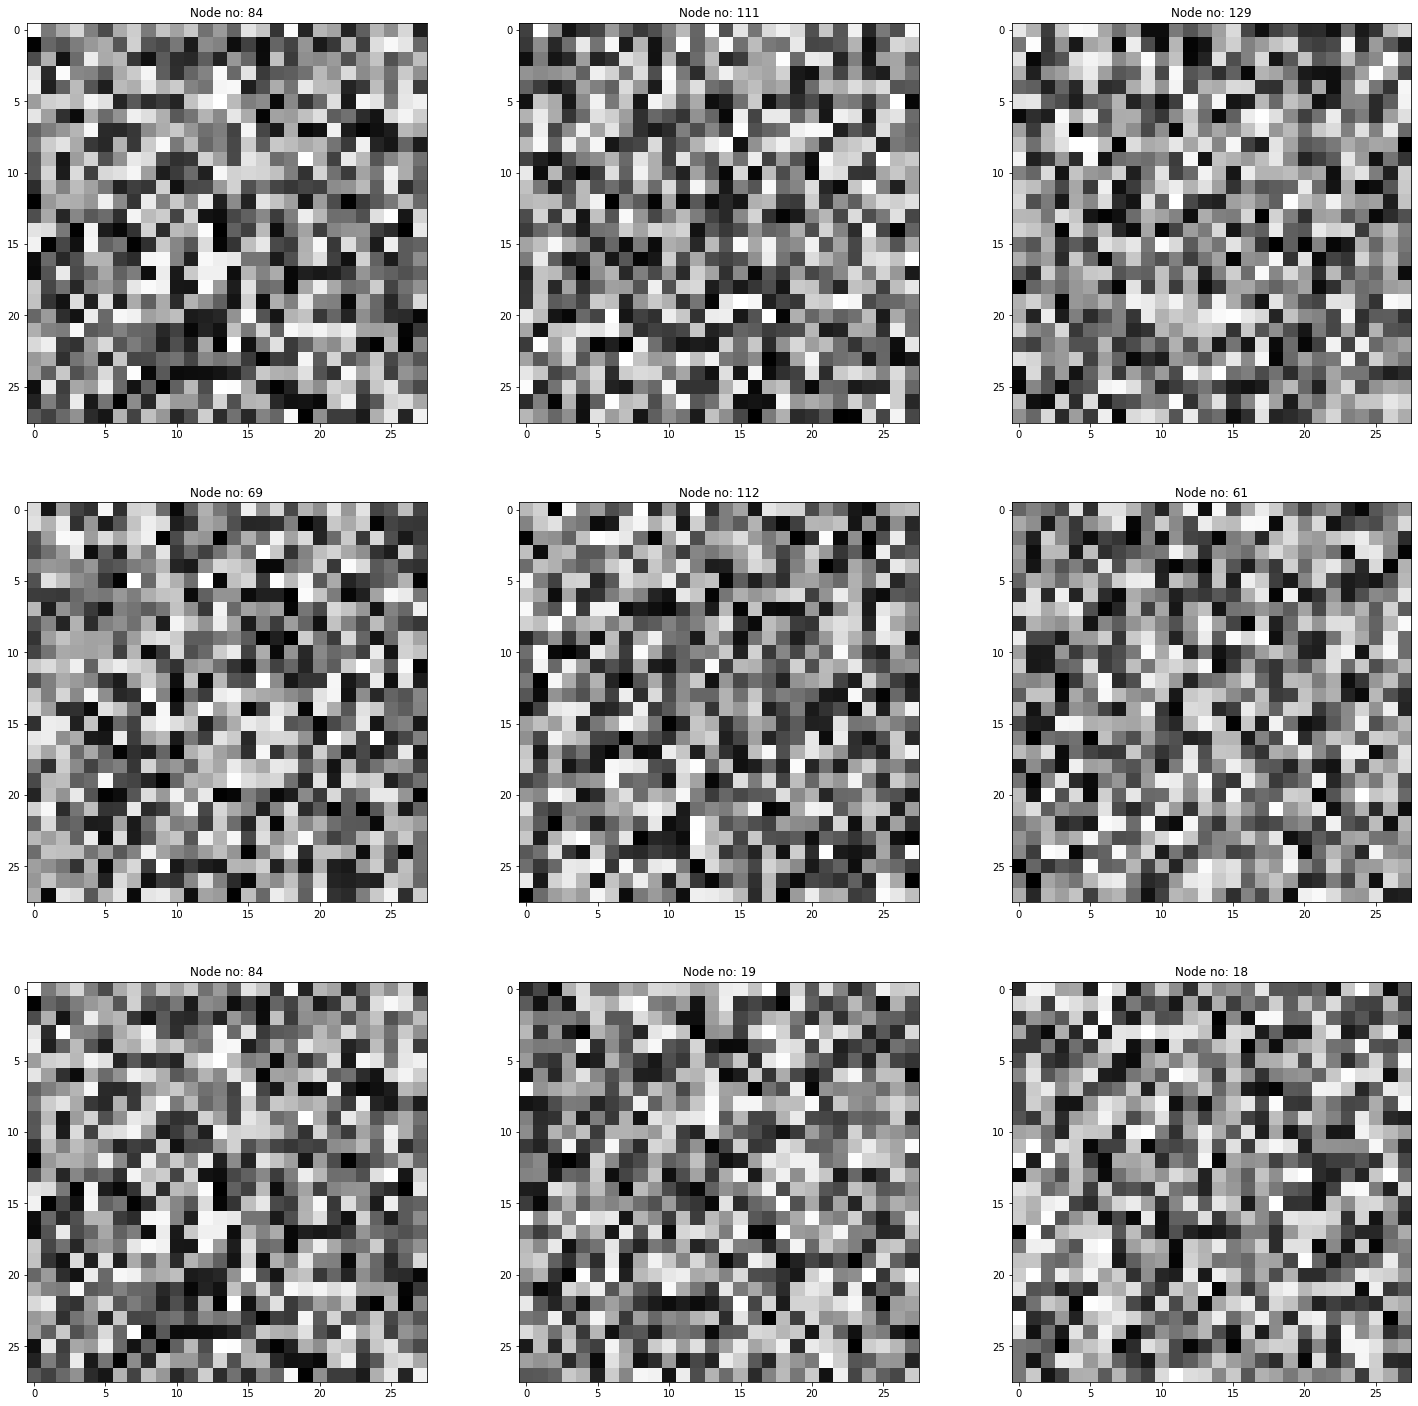

In [ ]:
n = 9
plt.figure(figsize=(25, 25))
for i in range(n):
    k = np.random.randint(0, 144)
    ax = plt.subplot(3, 3, i+1)
    plt.title("Node no: "+str(k))
    plt.imshow(w31[k], cmap='gray')
    plt.savefig("/content/drive/MyDrive/autoencoder_output/weight_img31"+str(np.random.randint(1, 100000))+".png")
plt.show

In [ ]:
encoder_op312 = encoder312.predict([test_data[1].reshape(-1,28,28,1)])
#plt.imshow(encoder_op312.reshape(10,10),cmap="gray")

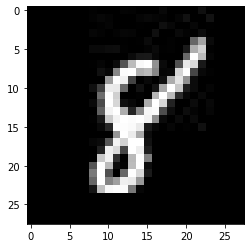

In [ ]:
model_op31 = Autoencoder31.predict([test_data[3500].reshape(-1,28,28,1)])
plt.imshow(test_data[3500],cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/31train_org_image3500.png")

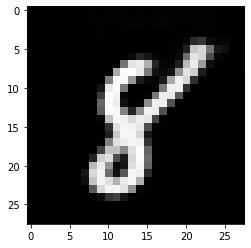

In [ ]:
model_op31=model_op31.reshape(28,28)
plt.imshow(model_op31,cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/31train_reconst_image3500.png")

In [ ]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out321 = keras.layers.Dense(100,activation='sigmoid')(x)
encoder321 = keras.Model(x_in,encoder_out321,name="encoder321")

encoder_out322 = keras.layers.Dense(64,activation='sigmoid')(encoder_out321)
encoder322 = keras.Model(x_in,encoder_out322,name="encoder322")

decoder_ip320 = keras.layers.Dense(100,activation='sigmoid')(encoder_out322)

decoder_ip321 = keras.layers.Dense(784,activation='sigmoid')(decoder_ip320)

decoder_op322 = keras.layers.Reshape((28,28,1))(decoder_ip321)
optimizer = keras.optimizers.Adam(learning_rate = 0.01,decay = 1e-6)

Autoencoder32 = keras.Model(x_in,decoder_op322,name="Autoencoder32")
Autoencoder32.summary()


Model: "Autoencoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dense_15 (Dense)            (None, 64)                6464      
                                                                 
 dense_16 (Dense)            (None, 100)               6500      
                                                                 
 dense_17 (Dense)            (None, 784)               79184     
                                                                 
 reshape_6 (Reshape)         (None, 28, 28, 1)       

Epoch 1/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0463 - accuracy: 0.6484 - val_loss: 0.0327 - val_accuracy: 0.6575
Epoch 2/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0276 - accuracy: 0.6616 - val_loss: 0.0256 - val_accuracy: 0.6621
Epoch 3/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0213 - accuracy: 0.6654 - val_loss: 0.0194 - val_accuracy: 0.6657
Epoch 4/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0180 - accuracy: 0.6672 - val_loss: 0.0188 - val_accuracy: 0.6661
Epoch 5/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0159 - accuracy: 0.6682 - val_loss: 0.0160 - val_accuracy: 0.6674
Epoch 6/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0144 - accuracy: 0.6690 - val_loss: 0.0150 - val_accuracy: 0.6680
Epoch 7/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0134 - accuracy: 0.6695 - val_loss: 0.0139 - val_accuracy: 0.6685

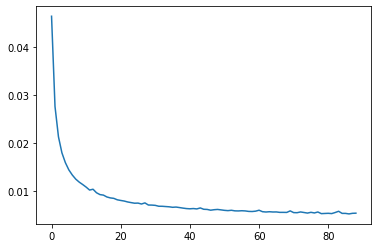

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
Autoencoder32.compile(optimizer,loss="mse",metrics=['accuracy'])
history32 = Autoencoder32.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
history_val32 = Autoencoder32.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback])
plt.plot(history32.history['loss'])

plt.savefig("/content/drive/MyDrive/autoencoder_output/A32loss.png")

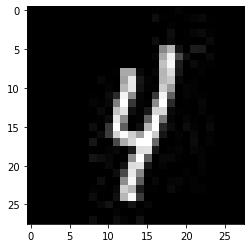

In [ ]:
model_op31 = Autoencoder31.predict([test_data[1].reshape(-1,28,28,1)])
plt.imshow(test_data[1],cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/test_original_image.png")

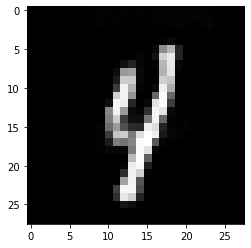

In [ ]:
model_op31=model_op31.reshape(28,28)
plt.imshow(model_op31,cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/test_reconstructed_image.png")

In [ ]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out332 = keras.layers.Dense(225,activation='sigmoid')(x)
encoder332 = keras.Model(x_in,encoder_out332,name="encoder332")

encoder_out332 = keras.layers.Dense(64,activation='sigmoid')(encoder_out332)
encoder332 = keras.Model(x_in,encoder_out332,name="encoder332")

decoder_ip330 = keras.layers.Dense(225,activation='sigmoid')(encoder_out332)

decoder_ip331 = keras.layers.Dense(784,activation='sigmoid')(decoder_ip330)

decoder_op332 = keras.layers.Reshape((28,28,1))(decoder_ip331)
optimizer = keras.optimizers.Adam(learning_rate = 0.01,decay = 1e-6)

Autoencoder33 = keras.Model(x_in,decoder_op332,name="Autoencoder33")
Autoencoder33.summary()

Model: "Autoencoder33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 225)               176625    
                                                                 
 dense_23 (Dense)            (None, 64)                14464     
                                                                 
 dense_24 (Dense)            (None, 225)               14625     
                                                                 
 dense_25 (Dense)            (None, 784)               177184    
                                                                 
 reshape_9 (Reshape)         (None, 28, 28, 1)       

Epoch 1/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0447 - accuracy: 0.6495 - val_loss: 0.0326 - val_accuracy: 0.6574
Epoch 2/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0265 - accuracy: 0.6622 - val_loss: 0.0233 - val_accuracy: 0.6635
Epoch 3/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0195 - accuracy: 0.6664 - val_loss: 0.0184 - val_accuracy: 0.6663
Epoch 4/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0158 - accuracy: 0.6683 - val_loss: 0.0157 - val_accuracy: 0.6677
Epoch 5/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0137 - accuracy: 0.6694 - val_loss: 0.0155 - val_accuracy: 0.6678
Epoch 6/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0124 - accuracy: 0.6699 - val_loss: 0.0129 - val_accuracy: 0.6690
Epoch 7/100
358/358 [==============================] - 2s 5ms/step - loss: 0.0112 - accuracy: 0.6705 - val_loss: 0.0122 - val_accuracy: 0.6694

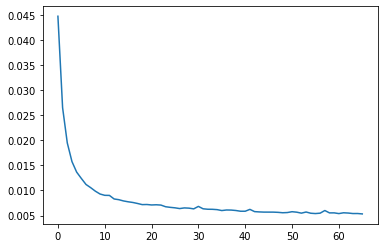

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
Autoencoder33.compile(optimizer,loss="mse",metrics=['accuracy'])
history33 = Autoencoder33.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
#history_val33 = Autoencoder33.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback])
plt.plot(history33.history['loss'])

plt.savefig("/content/drive/MyDrive/autoencoder_output/A33loss.png")

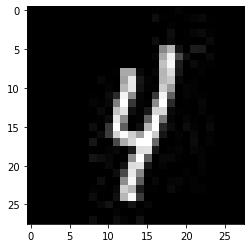

In [ ]:
model_op33 = Autoencoder33.predict([test_data[1].reshape(-1,28,28,1)])
plt.imshow(test_data[1],cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/test_original_image33.png")

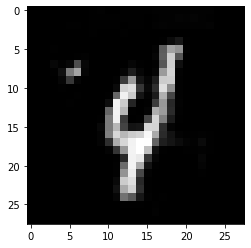

In [ ]:
model_op33=model_op33.reshape(28,28)
plt.imshow(model_op33,cmap="gray")
plt.savefig("/content/drive/MyDrive/autoencoder_output/test_reconstructed_image33.png")

In [ ]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out341 = keras.layers.Dense(256,activation='sigmoid')(x)
encoder341 = keras.Model(x_in,encoder_out341,name="encoder341")

encoder_out342 = keras.layers.Dense(100,activation='sigmoid')(encoder_out341)
encoder342 = keras.Model(x_in,encoder_out342,name="encoder342")

decoder_ip330 = keras.layers.Dense(256,activation='sigmoid')(encoder_out342)

decoder_ip331 = keras.layers.Dense(784,activation='sigmoid')(decoder_ip330)

decoder_op332 = keras.layers.Reshape((28,28,1))(decoder_ip331)
optimizer = keras.optimizers.Adam(learning_rate = 0.01,decay = 1e-6)

Autoencoder34 = keras.Model(x_in,decoder_op332,name="Autoencoder34")
Autoencoder34.summary()

Model: "Autoencoder34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 100)               25700     
                                                                 
 dense_20 (Dense)            (None, 256)               25856     
                                                                 
 dense_21 (Dense)            (None, 784)               201488    
                                                                 
 reshape_7 (Reshape)         (None, 28, 28, 1)       

Epoch 1/100
358/358 [==============================] - 3s 6ms/step - loss: 0.0417 - accuracy: 0.6516 - val_loss: 0.0318 - val_accuracy: 0.6583
Epoch 2/100
358/358 [==============================] - 2s 6ms/step - loss: 0.0216 - accuracy: 0.6651 - val_loss: 0.0177 - val_accuracy: 0.6666
Epoch 3/100
358/358 [==============================] - 2s 6ms/step - loss: 0.0148 - accuracy: 0.6688 - val_loss: 0.0148 - val_accuracy: 0.6682
Epoch 4/100
358/358 [==============================] - 2s 6ms/step - loss: 0.0122 - accuracy: 0.6700 - val_loss: 0.0133 - val_accuracy: 0.6688
Epoch 5/100
358/358 [==============================] - 2s 6ms/step - loss: 0.0110 - accuracy: 0.6705 - val_loss: 0.0123 - val_accuracy: 0.6694
Epoch 6/100
358/358 [==============================] - 2s 6ms/step - loss: 0.0100 - accuracy: 0.6709 - val_loss: 0.0107 - val_accuracy: 0.6699
Epoch 7/100
358/358 [==============================] - 2s 6ms/step - loss: 0.0093 - accuracy: 0.6712 - val_loss: 0.0102 - val_accuracy: 0.6701

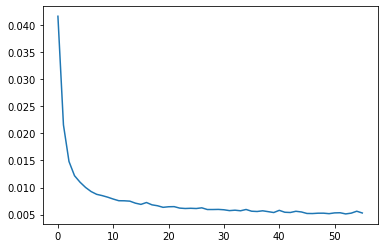

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
Autoencoder34.compile(optimizer,loss="mse",metrics=['accuracy'])
history34 = Autoencoder34.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
#history_val33 = Autoencoder33.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback])
plt.plot(history34.history['loss'])

plt.savefig("/content/drive/MyDrive/autoencoder_output/A34loss.png")

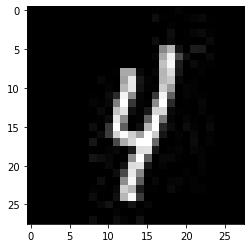

In [ ]:
model_op34 = Autoencoder34.predict([test_data[1].reshape(-1,28,28,1)])
plt.imshow(test_data[1],cmap="gray")
plt.savefig("D:\Autoencoder_op\test_original_image34.png")

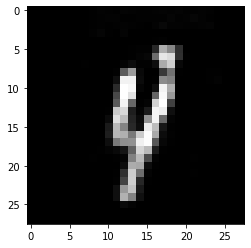

In [ ]:
model_op34=model_op34.reshape(28,28)
plt.imshow(model_op34,cmap="gray")
plt.savefig("D:\Autoencoder_op\test_reconstructed_image34.png")

In [ ]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out351 = keras.layers.Dense(324,activation='sigmoid')(x)
encoder351 = keras.Model(x_in,encoder_out351,name="encoder332")

encoder_out352 = keras.layers.Dense(144,activation='sigmoid')(encoder_out351)
encoder352 = keras.Model(x_in,encoder_out352,name="encoder332")

decoder_ip330 = keras.layers.Dense(324,activation='sigmoid')(encoder_out352)

decoder_ip331 = keras.layers.Dense(784,activation='sigmoid')(decoder_ip330)

decoder_op332 = keras.layers.Reshape((28,28,1))(decoder_ip331)
optimizer = keras.optimizers.Adam(learning_rate = 0.01,decay = 1e-6)

Autoencoder35 = keras.Model(x_in,decoder_op332,name="Autoencoder35")
Autoencoder35.summary()

Model: "Autoencoder35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 324)               254340    
                                                                 
 dense_27 (Dense)            (None, 144)               46800     
                                                                 
 dense_28 (Dense)            (None, 324)               46980     
                                                                 
 dense_29 (Dense)            (None, 784)               254800    
                                                                 
 reshape_9 (Reshape)         (None, 28, 28, 1)       

Epoch 1/100
358/358 [==============================] - 3s 8ms/step - loss: 0.0397 - accuracy: 0.6529 - val_loss: 0.0279 - val_accuracy: 0.6611
Epoch 2/100
358/358 [==============================] - 3s 7ms/step - loss: 0.0192 - accuracy: 0.6665 - val_loss: 0.0155 - val_accuracy: 0.6678
Epoch 3/100
358/358 [==============================] - 2s 7ms/step - loss: 0.0134 - accuracy: 0.6694 - val_loss: 0.0128 - val_accuracy: 0.6690
Epoch 4/100
358/358 [==============================] - 3s 7ms/step - loss: 0.0113 - accuracy: 0.6704 - val_loss: 0.0123 - val_accuracy: 0.6693
Epoch 5/100
358/358 [==============================] - 2s 7ms/step - loss: 0.0104 - accuracy: 0.6707 - val_loss: 0.0106 - val_accuracy: 0.6700
Epoch 6/100
358/358 [==============================] - 3s 7ms/step - loss: 0.0094 - accuracy: 0.6711 - val_loss: 0.0104 - val_accuracy: 0.6701
Epoch 7/100
358/358 [==============================] - 2s 7ms/step - loss: 0.0088 - accuracy: 0.6714 - val_loss: 0.0100 - val_accuracy: 0.6702

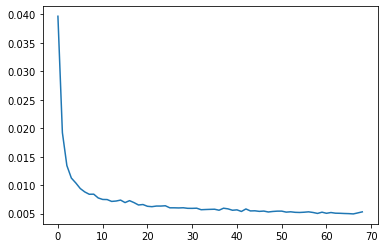

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
Autoencoder35.compile(optimizer,loss="mse",metrics=['accuracy'])
history35 = Autoencoder35.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
#history_val33 = Autoencoder33.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback])
plt.plot(history35.history['loss'])

plt.savefig("D:\Autoencoder_op\A35loss.png")

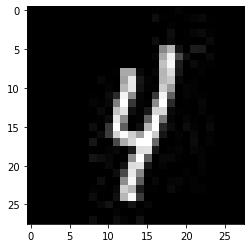

In [ ]:
model_op35 = Autoencoder35.predict([test_data[1].reshape(-1,28,28,1)])
plt.imshow(test_data[1],cmap="gray")
plt.savefig("D:\Autoencoder_op\test_original_image35.png")

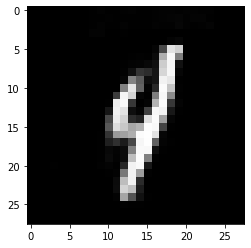

In [ ]:
model_op35=model_op35.reshape(28,28)
plt.imshow(model_op35,cmap="gray")
plt.savefig("D:\Autoencoder_op\test_reconstructed_image35.png")